In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [21]:
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.6, 0.4],  # 60% class 0, 40% class 1
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

In [22]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [24]:
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Training set: (600, 2), Validation set: (200, 2), Test set: (200, 2)


In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred_val = clf.predict(X_val)
y_prob_val = clf.predict_proba(X_val)[:, 1]

In [28]:
print("Predictions shape:", y_pred_val.shape)

Predictions shape: (200,)


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_val, y_pred_val)

In [31]:
title = "Confusion Matrix - DValidation Set"

In [32]:
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

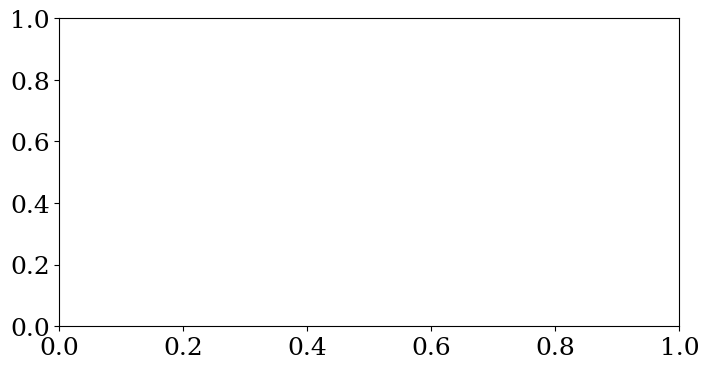

In [33]:
fig, ax = plt.subplots(figsize=(8, 4))

In [34]:
cmap = sns.color_palette("crest", as_cmap=True)

In [35]:
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True, ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

<Axes: >

In [36]:
ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(["Class 0", "Class 1"], rotation=45, fontsize=14)
ax.set_yticklabels(["Class 0", "Class 1"], rotation=0, fontsize=14)

[Text(0, 0.5, 'Class 0'), Text(0, 1.5, 'Class 1')]

In [37]:
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

In [38]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>